<a href="https://colab.research.google.com/github/HuzainAzis/citra/blob/master/5.PraFix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [8]:
#LOAD IMAGE DATASET
terinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi/')
print(len(terinfeksi_data)) #the output we get are the .png files

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi/')
print('\n')
print(tidakTerinfeksi_data[10:])

500


['C1_thinF_IMG_20150604_104722_cell_143.png', 'C1_thinF_IMG_20150604_104722_cell_191.png', 'C1_thinF_IMG_20150604_104722_cell_231.png', 'C1_thinF_IMG_20150604_104722_cell_216.png', 'C1_thinF_IMG_20150604_104722_cell_211.png', 'C1_thinF_IMG_20150604_104722_cell_242.png', 'C1_thinF_IMG_20150604_104722_cell_248.png', 'C1_thinF_IMG_20150604_104919_cell_31.png', 'C1_thinF_IMG_20150604_104919_cell_96.png', 'C1_thinF_IMG_20150604_104919_cell_82.png', 'C1_thinF_IMG_20150604_104919_cell_86.png', 'C1_thinF_IMG_20150604_104919_cell_84.png', 'C1_thinF_IMG_20150604_104919_cell_134.png', 'C1_thinF_IMG_20150604_104919_cell_132.png', 'C1_thinF_IMG_20150604_104919_cell_164.png', 'C1_thinF_IMG_20150604_104919_cell_163.png', 'C1_thinF_IMG_20150604_104919_cell_123.png', 'C1_thinF_IMG_20150604_104919_cell_157.png', 'C1_thinF_IMG_20150604_104919_cell_173.png', 'C1_thinF_IMG_20150604_104919_cell_189.png', 'C1_thinF_IMG_20150604_104919_cell_199.png', 'C1_thinF_IMG_20150604_104919_cell_224.png', 'C1_thin

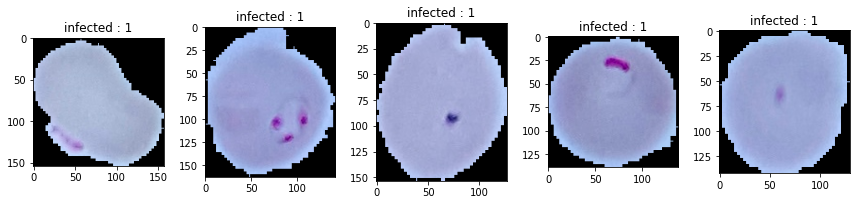

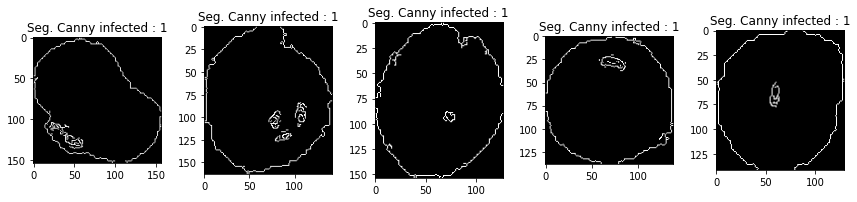

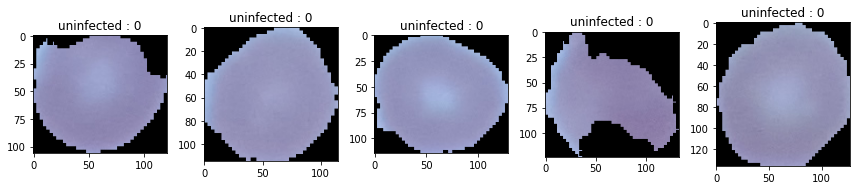

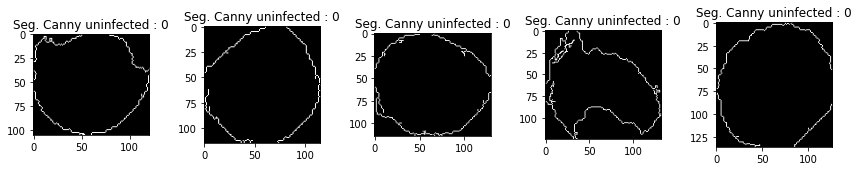

In [48]:
#VISUALISASI
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100,L2gradient=True)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI DAN HUMOMENT
x = np.array([['h1','h2','h3','h4','h5','h6','h7','target']])
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))


In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/dataset/malariax.csv", x, fmt='%s',delimiter=',' )

In [103]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/dataset/malariax.csv')
print (len(dataset))
print (dataset)

1000
           h1        h2            h3  ...            h6            h7  target
0    0.023963  0.000003  1.235240e-06  ... -1.021924e-09  3.040522e-14     1.0
1    0.016345  0.000002  6.049037e-08  ...  5.659561e-11  4.926718e-14     1.0
2    0.028576  0.000040  9.709428e-09  ...  2.584628e-10 -8.364369e-16     1.0
3    0.026203  0.000008  4.487093e-07  ...  6.891313e-10  9.782182e-14     1.0
4    0.031878  0.000007  3.233243e-08  ... -2.092504e-10 -7.165870e-15     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.030485  0.000005  1.279365e-07  ...  2.110881e-10 -3.651114e-14     0.0
996  0.028462  0.000050  4.774869e-07  ...  1.094316e-09 -3.143415e-14     0.0
997  0.026030  0.000027  1.201002e-07  ...  3.384707e-10 -9.987108e-15     0.0
998  0.030782  0.000250  1.039153e-06  ...  4.740689e-08 -1.238891e-12     0.0
999  0.030859  0.000072  9.693204e-07  ... -7.226727e-11 -4.662779e-14     0.0

[1000 rows x 8 columns]
